# Task 7: Conceptual Questions

## 1. What is the difference between Bagging and Boosting?

### Bagging
It stands for Bootstrap Aggregating. It trains multiple models independently in parallel. It reduces variance by averaging many models. In Bagging, all models are trained on random samples.

Ex- Random Forest

### Boosting
It refers to adaptive boosting of weak learners. It trains models sequentially, each trying to correct the errors of the previous. It reduces bias and variance by focusing on mistakes.

Ex- AdaBoost, Gradient Boosting, XGBoost.

## 2. How does Random Forest reduce variance?

1. It builds many decision trees on different random subsets of the data (bootstrapped samples).

2. It also uses random subsets of features at each split in the tree.

3. Each tree may overfit individually, but when their outputs are averaged (regression) or voted (classification), the overall model generalizes better.

4. The ensemble of uncorrelated trees helps cancel out individual errors, thus reducing the overall variance.

## 3. What is the weakness of boosting-based methods?

1. Boosting is sensitive to noisy data and outliers, as it keeps focusing on hard-to-predict instances.

2. It can overfit if the model is too complex or the number of boosting rounds is too high.

3. Boosting is sequential, so it is usually slower to train compared to bagging methods like Random Forest.

4. It often requires careful tuning of hyperparameters like learning rate, number of estimators, and tree depth for good performance.



# Task 8: Random Forest vs Decision Tree

In [1]:
pip install numpy pandas --upgrade

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score



● Train a RandomForestClassifier on the same dataset used for Task 5.

In [4]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12144\2380699926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12144\2380699926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

● Compare accuracy, precision, and recall with the standalone decision tree.

In [13]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")

evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)


Decision Tree Performance:
Accuracy : 0.7989
Precision: 0.8393
Recall   : 0.6351

Random Forest Performance:
Accuracy : 0.8268
Precision: 0.8116
Recall   : 0.7568


● Plot feature importances.

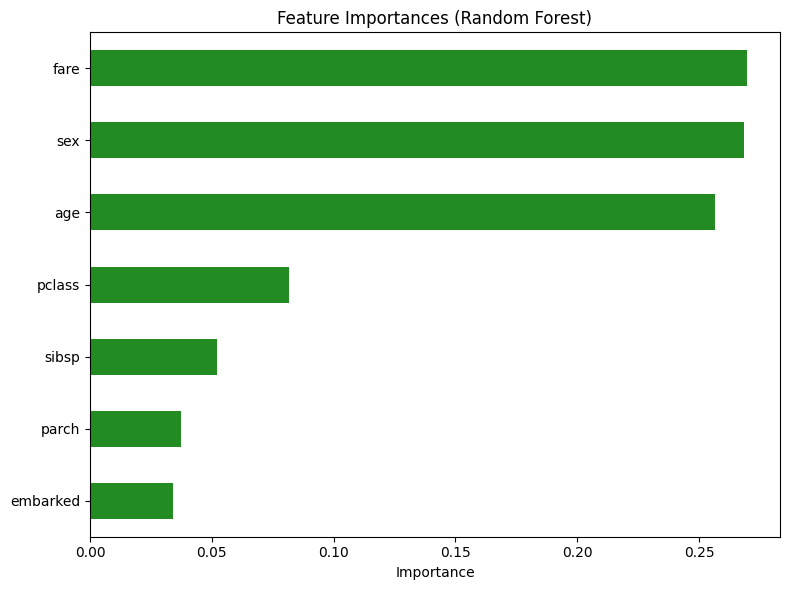

In [14]:
# Convert importances into a sorted DataFrame
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 6))
importances.plot(kind='barh', color='forestgreen')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


# Task 9:  AdaBoost or Gradient Boosting

In [16]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import seaborn as sns


● Train an AdaBoostClassifier or GradientBoostingClassifier.

In [17]:
# Load dataset
df = sns.load_dataset("titanic")

# Select and preprocess features
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Define features and target
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12144\3704250657.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12144\3704250657.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [19]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    t = end - start
    
    results[name] = {
        'Accuracy': round(acc, 4),
        'F1-Score': round(f1, 4),
        'Training Time (s)': round(t, 4)
    }


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


● Compare it with Random Forest and Decision Tree in terms of:

○ Accuracy

○ F1-score

○ Training time (optional)

In [20]:
results_df = pd.DataFrame(results).T
print(results_df)


                   Accuracy  F1-Score  Training Time (s)
Decision Tree        0.7989    0.7231             0.0062
Random Forest        0.8268    0.7832             0.1220
AdaBoost             0.8101    0.7671             0.1162
Gradient Boosting    0.8045    0.7407             0.0906
